# Проект e-learning
**Необходимо проанализировать завершенные уроки и ответить на следующие вопросы:**

1. Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

2. Какой экзамен является самым сложным? Какой самым простым? Какие курсы и экзамены в рамках курса обладают самой низкой и самой высокой завершаемостью (кол-во успешных экзаменов / кол-во всех попыток сдать экзамен)?

3. Какой средний срок сдачи экзаменов по каждому предмету?

4. Какие самые популярные предметы (ТОП-3) по количеству регистраций на них? Предметы с самым большим оттоком (ТОП-3)?

5. В период с начала 2013 по конец 2014 какой семестр был с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов?

6. Какая аудитория на курсе? Для определения необходимо построить адаптированные RFM-кластеры студентов.

### Ответы на вопросы:

**1. Сколько студентов успешно сдали только один курс?**

Ответ: 3802 студента прошли только один курс, также 536 студентов не сдали ни одного экзамена, а 295 студентов успешно прошли 2 курса

**2. Какой экзамен является самым сложным? Какой самым простым? Какие курсы и экзамены в рамках курса обладают самой низкой и самой высокой завершаемостью?**

Ответ: самым сложным и самым простым оказался один и тот же предмет, сданный в одном и том же семестре, но в разные года.

Так, сложнее всего студентам дался экзамен по предмету DDD в семестре 2013B (id 25340) - 83,72% студентов справились со сдачей экзамена. Самым простым оказался экзамен по предмету DDD в семестре 2014B (id 25361) - 92,56% студентов успешно сдали экзамен.

По имеющимся данным видно, что студенты сдавали только 6 экзаменов из 24 имеющихся. Из этих этих 6 экзаменов 4 были по одному курсу, 2 - по второму, поэтому результаты, полученные выше - не удивительны.

При этом завершаемость самих курсов (CCC и DDD) примерно одинаковая (88% и 89% соответственно).

**3. Какой средний срок сдачи экзаменов по каждому предмету?**

Ответ: по предмету CCC средний срок сдачи экзамена составляет 239 дней, по предмету DDD - 237 дней.

**4. Какие самые популярные предметы (ТОП-3) по количеству регистраций на них? Предметы с самым большим оттоком (ТОП-3)?**

Топ-3 самых популярных предмета по количеству регистраций на них: BBB - 7900 регистраций, FFF - 7751 рег., DDD - 6257 рег.

Самое большое количество отмен регистраций происходит также по этим трем предметам: FFF - 2370 отмен, BBB - 2369 отмен, DDD - 2223 отмены.

По процентному соотношению регистраций и отмен антилидером является предмет CCC - 43,89% отмен,  на втором месте DDD - 35,53% отмен, на третьей позиции FFF - 30,58% отмен.

**5. В период с начала 2013 по конец 2014 какой семестр был с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов?**

Ответ: 2013B - семестр с самой низкой завершаемостью курсов; 84% студентов успешно сдали экзамен по курсу. Из 602 студентов - 504 успешно окончили курс; 98 дошли до конца курса, но не смогли сдать экзамен на оценку выше 40 баллов.

Cамые долгие средние сроки сдачи курсов наблюдались в семестре 2014J. С момента начала семестра до успешной сдачи экзаменов в среднем проходит 244 дня.
    
**6. Какая аудитория на курсе? Для определения необходимо построить адаптированные RFM-кластеры студентов.** 

Вывод: большинство студентов 42% (1974 чел.) лояльны к нам, они на хороший балл прошли один курс.

39% (1821 чел.) завершили один курс с превосходным результатом.

Студенты группы "help" (11%, 536 чел.) не справились ни с одним экзаменом, возможно им нужна помощь.

Группа "job offer" (3%, 183 чел.) показала наилучшие результаты по двум курсам. Это первые претенденты на вакантные места потенциальных работодателей.

Студенты группы "Champion" (2%, 112 чел.) также продемонстрировали хорошие результаты по двум экзаменам, они будут рассматриваться во вторую очередь.

В последнюю группу вошли те, кто успешно сдал экзамен по одному курсу, но по каким-то причинам не прошел второй. С ними должна проводиться индивидуальная работа с выяснением причин провала.

In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
assessments         = pd.read_csv('assessments.csv')
courses             = pd.read_csv('courses.csv')
studentAssessment   = pd.read_csv('studentAssessment.csv')
studentRegistration = pd.read_csv('studentRegistration.csv')

In [3]:
# assessments         = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/PBW7aUHGuodFDA')
# courses             = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/m0Z6QYNT46f9tQ')
# studentAssessment   = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/lsmdbYB0iM7p3w')
# studentRegistration = pd.read_csv('https://getfile.dokpub.com/yandex/get/https://disk.yandex.ru/d/Yse4Y6RJqg_WaA')

1. **assessments.csv** — этот файл содержит информацию об оценках в тесте. Обычно каждый предмет в семестре включает ряд тестов с /оценками, за которыми следует заключительный экзаменационный тест (экзамен).
 * code_module — идентификационный код предмета.
 * code_presentation — семестр (Идентификационный код).
 * id_assessment — тест (Идентификационный номер ассессмента).
 * assessment_type — тип теста. Существуют три типа оценивания: оценка преподавателя (TMA), компьютерная оценка (СМА), экзамен по курсу (Exam).
 * date — информация об окончательной дате сдачи теста. Рассчитывается как количество дней с момента начала семестра. Дата начала семестра имеет номер 0 (ноль).
 * weight — вес теста в % в оценке за курс. Обычно экзамены рассматриваются отдельно и имеют вес 100%; сумма всех остальных оценок составляет 100%.

In [4]:
assessments.head()

,code_module,code_presentation,id_assessment,assessment_type,date,weight
0,AAA,2013J,1752,TMA,19.0,10.0
1,AAA,2013J,1753,TMA,54.0,20.0
2,AAA,2013J,1754,TMA,117.0,20.0
3,AAA,2013J,1755,TMA,166.0,20.0
4,AAA,2013J,1756,TMA,215.0,30.0


2. **courses.csv** — файл содержит список предметов по семестрам.
 * code_module — предмет (идентификационный код).
 * ode_presentation — семестр (идентификационный код).
 * module_presentation_length — продолжительность семестра в днях.

In [5]:
courses.head()

,code_module,code_presentation,module_presentation_length
0,AAA,2013J,268
1,AAA,2014J,269
2,BBB,2013J,268
3,BBB,2014J,262
4,BBB,2013B,240


3. **studentAssessment.csv** — этот файл содержит результаты тестов студентов. Если учащийся не отправляет работу на оценку, результат не записывается в таблицу.
 * id_assessment — тест (идентификационный номер).
 * id_student — идентификационный номер студента.
 * date_submitted — дата сдачи теста студентом, измеряемая как количество дней с начала семестра.
 * is_banked — факт перезачета теста с прошлого семестра (иногда курсы перезачитывают студентам, вернувшимся из академического отпуска).
 * score — оценка учащегося в этом тесте. Диапазон составляет от 0 до 100. Оценка ниже 40 неудачная/неуспешная сдача теста.

In [6]:
studentAssessment.head()

,id_assessment,id_student,date_submitted,is_banked,score
0,1752,11391,18,0,78.0
1,1752,28400,22,0,70.0
2,1752,31604,17,0,72.0
3,1752,32885,26,0,69.0
4,1752,38053,19,0,79.0


4. **studentRegistration.csv** — этот файл содержит информацию о времени, когда студент зарегистрировался для прохождения курса в семестре.
 * code_module — предмет (идентификационный код).
 * code_presentation — семестр (идентификационный код)
 * id_student — идентификационный номер студента.
 * date_registration — дата регистрации студента. Это количество дней, измеренное от начала семестра (например, отрицательное значение -30 означает, что студент зарегистрировался на прохождение курса за 30 дней до его начала).
 * date_unregistration — дата отмены регистрации студента с предмета. У студентов, окончивших курс, это поле остается пустым.

In [7]:
studentRegistration.head()

,code_module,code_presentation,id_student,date_registration,date_unregistration
0,AAA,2013J,11391,-159.0,NaN
1,AAA,2013J,28400,-53.0,NaN
2,AAA,2013J,30268,-92.0,12.0
3,AAA,2013J,31604,-52.0,NaN
4,AAA,2013J,32885,-176.0,NaN


>Для решения задачи проведи предварительное исследование данных и сформулируй, что должно считаться курсом. Обосновать свой выбор ты можешь с помощью фактов сдачи экзаменов, распределения студентов и уникальный идентификатор курса.*

### Курс - это предмет (code_module), изучаемый за определенный семестр (code_presentation)

# 1
>Сколько студентов успешно сдали только один курс? (Успешная сдача — это зачёт по курсу на экзамене)

*Оценка выше 40 баллов*


Нас интересует не только, какие тесты сдавали студенты, но и какие они получили результаты, поэтому объединим две таблицы studentAssessment и assessments по полю id_assessment

In [8]:
students_results = studentAssessment.merge(assessments, on='id_assessment')
students_results

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
0,1752,11391,18,0,78.0,AAA,2013J,TMA,19.0,10.0
1,1752,28400,22,0,70.0,AAA,2013J,TMA,19.0,10.0
2,1752,31604,17,0,72.0,AAA,2013J,TMA,19.0,10.0
3,1752,32885,26,0,69.0,AAA,2013J,TMA,19.0,10.0
4,1752,38053,19,0,79.0,AAA,2013J,TMA,19.0,10.0
...,...,...,...,...,...,...,...,...,...,...
173907,37443,527538,227,0,60.0,GGG,2014J,CMA,229.0,0.0
173908,37443,534672,229,0,100.0,GGG,2014J,CMA,229.0,0.0
173909,37443,546286,215,0,80.0,GGG,2014J,CMA,229.0,0.0
173910,37443,546724,230,0,100.0,GGG,2014J,CMA,229.0,0.0


In [9]:
# Выберем те тесты, где тип_теста == экзамен
exams = students_results.loc[students_results.assessment_type == 'Exam']
exams

,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0
...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0


In [10]:
# добавим колонку success: если экзамен сдан успешно, то в колонку
# будет записано значение 1, иначе - 0
exams['success'] = exams.score.apply(lambda x: 1 if x >= 40 else 0)
exams

/opt/tljh/user/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id_assessment,id_student,date_submitted,is_banked,score,code_module,code_presentation,assessment_type,date,weight,success
52923,24290,558914,230,0,32.0,CCC,2014B,Exam,NaN,100.0,0
52924,24290,559706,234,0,78.0,CCC,2014B,Exam,NaN,100.0,1
52925,24290,559770,230,0,54.0,CCC,2014B,Exam,NaN,100.0,1
52926,24290,560114,230,0,64.0,CCC,2014B,Exam,NaN,100.0,1
52927,24290,560311,234,0,100.0,CCC,2014B,Exam,NaN,100.0,1
...,...,...,...,...,...,...,...,...,...,...,...
95980,25368,652680,243,0,91.0,DDD,2014J,Exam,NaN,100.0,1
95981,25368,652732,249,0,47.0,DDD,2014J,Exam,NaN,100.0,1
95982,25368,652965,242,0,87.0,DDD,2014J,Exam,NaN,100.0,1
95983,25368,653051,242,0,27.0,DDD,2014J,Exam,NaN,100.0,0


In [11]:
# По условию нас интересует, сколько студентов успешно сдали
# только один курс, поэтому посчитаем количество сданных экзаменов
# с разбивкой по числу сданных экзаменов
exams \
    .groupby('id_student', as_index=False) \
    .agg({'success': 'sum'}) \
    .success.value_counts()

1    3802
0     536
2     295
Name: success, dtype: int64

**Ответ: 3802 студента прошли только один курс**, также 536 студентов не сдали ни одного экзамена, а 295 студентов успешно прошли 2 курса

# 2
>Какой экзамен является самым сложным? Какой самым простым? Какие курсы и экзамены в рамках курса обладают самой низкой и самой высокой завершаемостью (кол-во успешных экзаменов / кол-во всех попыток сдать экзамен)?

In [12]:
# Все попытки сдать экзамен
exam_tries = exams \
    .groupby('id_assessment', as_index=False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'tries'})
exam_tries

,id_assessment,tries
0,24290,747
1,24299,1168
2,25340,602
3,25354,968
4,25361,524
5,25368,950


In [13]:
# Успешные попытки сдать экзамен
exam_success = exams \
    .query('success >= 1') \
    .groupby('id_assessment', as_index=False) \
    .agg({'id_student': 'count'}) \
    .rename(columns={'id_student': 'success'})
exam_success

,id_assessment,success
0,24290,664
1,24299,1019
2,25340,504
3,25354,878
4,25361,485
5,25368,842


In [14]:
exam_comparison = exam_tries.merge(exam_success, on='id_assessment')
exam_comparison

,id_assessment,tries,success
0,24290,747,664
1,24299,1168,1019
2,25340,602,504
3,25354,968,878
4,25361,524,485
5,25368,950,842


In [15]:
# Посчитаем процент успешной сдачи экзаменов
exam_comparison['percentage'] = (exam_comparison.success / exam_comparison.tries * 100).round(2)
exam_comparison = exam_comparison.sort_values('percentage', ascending=False)
exam_comparison.sort_values('percentage')

,id_assessment,tries,success,percentage
2,25340,602,504,83.72
1,24299,1168,1019,87.24
5,25368,950,842,88.63
0,24290,747,664,88.89
3,25354,968,878,90.70
4,25361,524,485,92.56


Как мы видим на таблице выше, экзамен с самым низким процентом завершаемости - это экзамен с номером 25340. Найдем его код предмета и семестра в таблице assessments

In [16]:
assessments.query('id_assessment == 25340')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
87,DDD,2013B,25340,Exam,240.0,100.0


Теперь найдем од предмета и семестра предмета с самым высоким процентом завершаемости - это экзамен с номером 25361

In [17]:
assessments.query('id_assessment == 25361')

,code_module,code_presentation,id_assessment,assessment_type,date,weight
101,DDD,2014B,25361,Exam,241.0,100.0


Так мы выяснили, какой экзамены был легким, а какой сложным для студентов. Теперь выясним то же самое в рамках курсов.

In [18]:
courses_comparison = exams \
    .groupby(['code_module', 'success']) \
    .agg({'id_student': 'count'}) \
    .reset_index() \
    .pivot(index='code_module', columns='success', values='id_student') \
    .reset_index() \
    .rename(columns={0: 'fail', 1: 'success'})
courses_comparison['tries'] = courses_comparison['fail'] + courses_comparison['success']
courses_comparison['percentage'] = (courses_comparison['success'] / courses_comparison['tries']).round(2)
courses_comparison.sort_values('percentage')

success,code_module,fail,success,tries,percentage
0,CCC,232,1683,1915,0.88
1,DDD,335,2709,3044,0.89


**Ответ:** самым сложным и самым простым оказался один и тот же предмет, сданный в одном и том же семестре, но в разные года.

Так, **сложнее всего** студентам дался экзамен по предмету DDD в семестре 2013B (id **25340**) - 83,72% студентов справились со сдачей экзамена. **Самым простым** оказался экзамен по предмету DDD в семестре 2014B (id **25361**) - 92,56% студентов успешно сдали экзамен.

По имеющимся данным видно, что студенты сдавали только 6 экзаменов из 24 имеющихся. Из этих этих 6 экзаменов 4 были по одному курсу, 2 - по второму, поэтому результаты, полученные выше - не удивительны.

При этом завершаемость самих курсов (CCC и DDD) примерно одинаковая (88% и 89% соответственно).

# 3
>Какой средний срок сдачи экзаменов по каждому предмету?

Отбираем все успешные экзамены и считаем среднее по date_submitted

In [19]:
exams.query('success == 1') \
    .groupby('code_module') \
    .agg({'date_submitted': 'mean'}).round(2)

,date_submitted
code_module,
CCC,239.35
DDD,237.98


**Ответ: по предмету CCC средний срок сдачи экзамена составляет 239 дней, по предмету DDD - 237 дней.**

# 4
>Какие самые популярные предметы (ТОП-3) по количеству регистраций на них? Предметы с самым большим оттоком (ТОП-3)?


In [20]:
# Сгруппируем данные из таблицы по регистрациям по коду предмета и 
# посчитаем количество строк в группе (кол-во регистраций)
registration = studentRegistration.groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False) \
    .rename(columns={'id_student': 'registrations'})
registration

,code_module,registrations
1,BBB,7692
5,FFF,7397
3,DDD,5848
2,CCC,4251
4,EEE,2859
6,GGG,2525
0,AAA,712


In [21]:
# Удалим пустые значения из таблицы по регистрациям (те студенты, 
# которые завершили курс, именют пустые значения в колонке "дата отмены")
# Сгруппируем данные по коду предмета и посчитаем количество строк в группе (кол-во отмен)
cancellation = studentRegistration.dropna() \
    .groupby('code_module', as_index=False) \
    .agg({'id_student': 'nunique'}) \
    .sort_values('id_student', ascending=False) \
    .rename(columns={'id_student': 'cancellations'})
cancellation

,code_module,cancellations
1,BBB,2306
5,FFF,2239
3,DDD,2058
2,CCC,1851
4,EEE,692
6,GGG,287
0,AAA,116


In [22]:
# Создадим таблицу сравнения регистраций и отмен
comparison = registration.merge(cancellation, on='code_module')
comparison

,code_module,registrations,cancellations
0,BBB,7692,2306
1,FFF,7397,2239
2,DDD,5848,2058
3,CCC,4251,1851
4,EEE,2859,692
5,GGG,2525,287
6,AAA,712,116


In [23]:
# Посчитаем процент отмен
comparison['persentage'] = (comparison.cancellations / comparison.registrations).round(2)
comparison.sort_values('persentage', ascending=False)

,code_module,registrations,cancellations,persentage
3,CCC,4251,1851,0.44
2,DDD,5848,2058,0.35
0,BBB,7692,2306,0.30
1,FFF,7397,2239,0.30
4,EEE,2859,692,0.24
6,AAA,712,116,0.16
5,GGG,2525,287,0.11


In [24]:
comparison.persentage.mean()

0.2714285714285714

**Ответ:** топ-3 самых популярных предмета по **количеству регистраций** на них: BBB - 7692 регистраций, FFF - 7397 рег., DDD - 5848 рег.

Самое большое **количество отмен** регистраций происходит также по этим трем предметам: BBB - 2306 отмен, FFF - 2239 отмен, DDD - 2058 отмены.

По **процентному соотношению** регистраций и отмен антилидером является предмет CCC - 44% отмен,  на втором месте DDD - 35% отмен, на третьей позиции FFF - 30% отмен.

# 5
>В период с начала 2013 по конец 2014 какой семестр был с самой низкой завершаемостью курсов и самыми долгими средними сроками сдачи курсов?


In [25]:
# Посчитаем процент успешной сдачи курсов среди студентов,
# которые сдавали экзамены

semestr_comparison = exams \
    .groupby(['code_presentation', 'success']) \
    .agg({'id_student': 'nunique'}) \
    .reset_index() \
    .pivot(index='code_presentation', columns='success', values='id_student') \
    .reset_index() \
    .rename(columns={0: 'fail', 1: 'success'})
semestr_comparison['tries'] = semestr_comparison['fail'] + semestr_comparison['success']
semestr_comparison['percentage'] = (semestr_comparison['success'] / semestr_comparison['tries']).round(2)
semestr_comparison.sort_values('percentage')

success,code_presentation,fail,success,tries,percentage
0,2013B,98,504,602,0.84
3,2014J,257,1814,2071,0.88
2,2014B,122,1140,1262,0.90
1,2013J,90,878,968,0.91


In [26]:
# Посчитаем, сколько в среднем проходит дней с момента начала семестра до успешной сдачи экзаменов

exams.query('success == 1') \
    .groupby('code_presentation') \
    .agg({'date_submitted': 'mean'}) \
    .reset_index() \
    .rename(columns={'date_submitted': 'average_days'}).round(2) \
    .sort_values('average_days', ascending=False)

,code_presentation,average_days
3,2014J,243.68
1,2013J,239.51
2,2014B,233.00
0,2013B,230.16


**Ответ: 2013B - семестр с самой низкой завершаемостью курсов; 84% студентов успешно сдали экзамен по курсу.** Из 602 студентов - 504 успешно окончили курс; 98 дошли до конца курса, но не смогли сдать экзамен на оценку выше 40 баллов.

**Cамые долгие средние сроки сдачи курсов наблюдались в семестре 2014J**. С момента начала семестра до успешной сдачи экзаменов в среднем проходит 244 дня.

# 6
>Какая аудитория на курсе? Для определения необходимо построить адаптированные RFM-кластеры студентов.
 
В адаптированной кластеризации используются следующие метрики:
 * R - среднее время сдачи одного экзамена, 
 * F - завершаемость курсов,
 * M - среднее количество баллов, получаемое за экзамен. 


Для того, чтобы рассчитать RFM-сегменты, нам нужно сначала рассчитать оценки R, F и M по шкале от 1 (худший) до 3 (лучший).

1. R - посчитаем среднее всемя сдачи одного экзамена.
2. F - посчитаем количество завершенных курсов.
3. M - посчитаем среднее количество баллов, полученное за экзамен в 2014 году каждым студентом.
4. Разделим на сегменты R, F и M.
5. Составим рейтинг RFM, соединив R, F и M.
6. Визуализируем рейтинг.

### R - среднее время сдачи одного экзамена

In [27]:
rfm_r = exams.groupby('id_student') \
    .agg({'date_submitted': 'mean'}) \
    .reset_index() \
    .rename(columns={'date_submitted': 'r_score'})
rfm_r.head()

,id_student,r_score
0,23698,243.0
1,24213,236.0
2,27116,243.0
3,28046,237.0
4,28787,243.0


### F - завершаемость курсов. 

У нас всего 3 варианта метрики "завершаемость" для студента: не сдал ни одного курса, сдал 1, сдал 2. По сути, это сумма exam_passing для каждого студента.

In [28]:
rfm_f = exams.groupby('id_student') \
    .agg({'success': 'sum'}) \
    .rename(columns={'success': 'f_score'}) \
    .reset_index()
rfm_f.head()

,id_student,f_score
0,23698,1
1,24213,1
2,27116,1
3,28046,1
4,28787,1


### M - среднее количество баллов, получаемое за экзамен

In [29]:
rfm_m = exams.groupby('id_student') \
    .agg({'score': 'mean'}) \
    .reset_index() \
    .rename(columns={'score': 'm_score'})
rfm_m.head()

,id_student,m_score
0,23698,80.0
1,24213,58.0
2,27116,96.0
3,28046,40.0
4,28787,44.0


In [30]:
# Теперь объединим таблицы по полю id_student для дальнейшего анализа
rfm = rfm_r.merge(rfm_f, on='id_student')

In [31]:
rfm = rfm.merge(rfm_m, on='id_student')
rfm

,id_student,r_score,f_score,m_score
0,23698,243.0,1,80.0
1,24213,236.0,1,58.0
2,27116,243.0,1,96.0
3,28046,237.0,1,40.0
4,28787,243.0,1,44.0
...,...,...,...,...
4628,2694886,236.0,1,69.0
4629,2694933,230.0,1,73.0
4630,2695608,237.0,1,73.0
4631,2697181,230.0,1,80.0


In [32]:
# Посмотрим на характеристики r_score для выбора способа сортировки

rfm.r_score.describe()

count    4633.000000
mean      238.462227
std         5.653378
min       229.000000
25%       234.000000
50%       241.000000
75%       243.000000
max       285.000000
Name: r_score, dtype: float64

In [33]:
# Расчитаем границы интервалов для сортировки m_score
rfm.m_score.quantile(q=[0.333, 0.666, 1])

0.333     56.0
0.666     76.0
1.000    100.0
Name: m_score, dtype: float64

#### # Сгруппируем данные в столбцах по средующим критериям:

* R - среднее время сдачи одного экзамена:
    - **r_score >= 243**     
        - AS 1  # самое долгое время сдачи
    - **243 < r_score <= 234**
        - AS 2  # среднее время сдачи
    - **r_score < 234**
        - AS 3  # самое быстрое время сдачи
    
* F - завершаемость курсов:
    - **f_score == 0**
        - AS 1  # не завершили ни один курс
    - **f_score == 1**
        - AS 2  # успешно завершили 1 курс
    - **f_score == 2**
        - AS 3  # успешно завершили 2 курса
     
* M - среднее количество баллов, получаемое за экзамен:
    - **m_score < 40**
        - AS 1  # не сдали экзамен
    - **40  <= m_score < 70**
        - AS 2  # сдали и получили удовлетворительный результат
    - **m_score >= 70**
        - AS 3  # сдали и получили отличный результат

Чем выше ранг, тем лучше

In [34]:
def r_score(x):
    if x >= 243:
        return 1
    elif x < 234:
        return 3
    else:
        return 2

def f_score(x):
    if x == 0:
        return 1
    elif x == 1:
        return 2
    else:
        return 3

def m_score(x):
    if x < 40:
        return 1
    elif x >= 70:
        return 3
    else:
        return 2

In [35]:
# добавим ранги в соответствующие столбцы таблицы
rfm['R'] = rfm['r_score'].apply(lambda x: r_score(x))
rfm['F'] = rfm['f_score'].apply(lambda x: f_score(x))
rfm['M'] = rfm['m_score'].apply(lambda x: m_score(x))

In [36]:
rfm

,id_student,r_score,f_score,m_score,R,F,M
0,23698,243.0,1,80.0,1,2,3
1,24213,236.0,1,58.0,2,2,2
2,27116,243.0,1,96.0,1,2,3
3,28046,237.0,1,40.0,2,2,2
4,28787,243.0,1,44.0,1,2,2
...,...,...,...,...,...,...,...
4628,2694886,236.0,1,69.0,2,2,2
4629,2694933,230.0,1,73.0,3,2,3
4630,2695608,237.0,1,73.0,2,2,3
4631,2697181,230.0,1,80.0,3,2,3


In [37]:
# соединим ранги в однин столбец
rfm['RFM_score'] = rfm['R'].map(str) + rfm['F'].map(str) + rfm['M'].map(str)
rfm.head()

,id_student,r_score,f_score,m_score,R,F,M,RFM_score
0,23698,243.0,1,80.0,1,2,3,123
1,24213,236.0,1,58.0,2,2,2,222
2,27116,243.0,1,96.0,1,2,3,123
3,28046,237.0,1,40.0,2,2,2,222
4,28787,243.0,1,44.0,1,2,2,122


In [38]:
# Сгруппируем таблицу по получившимся рангам
result = rfm.groupby('RFM_score', as_index=False).agg({'id_student': 'count'})
result

,RFM_score,id_student
0,111,197
1,121,1
2,122,651
3,123,670
4,132,29
5,133,48
6,211,204
7,221,5
8,222,848
9,223,798


#### Аудитория разделилась на 17 категорий, опишем каждую из них, а затем разделим на смысловые подгруппы

* 111:  **help**
    * долгое время сдачи, 
    * не сдал ни один экзамен, 
    * не сдал один экзамен.
* 121: **attention**
    * долгое время сдачи, 
    * сдал один экзамен, 
    * не сдал один экзамен.
* 122: **loyal**
    * долгое время сдачи, 
    * сдал один экзамен, 
    * хорошо сдал экзамен.
* 123: **excellent**
    * долгое время сдачи, 
    * сдал один экзамен, 
    * отлично сдал экзамен.
* 132: **champion**
    * долгое время сдачи, 
    * сдал два экзамена, 
    * хорошо сдал экзамен.
* 133: **job_offer**
    * долгое время сдачи, 
    * сдал два экзамена, 
    * отлично сдал экзамен.
    
    
* 211: **help**
    * не сдал ни один экзамен, 
    * прошел один, 
    * не сдал один экзамен.
* 221: **attention**
    * среднне время сдачи, 
    * сдал один экзамен, 
    * не сдал один экзамен.
* 222: **loyal**
    * среднне время сдачи, 
    * сдал один экзамен, 
    * хорошо сдал экзамен.
* 223: **excellent**
    * среднне время сдачи, 
    * сдал один экзамен, 
    * отлично сдал экзамен.
* 232: **champion**
    * среднне время сдачи, 
    * сдал два экзамена, 
    * хорошо сдал экзамен.
* 233: **job_offer**
    * среднне время сдачи, 
    * сдал два экзамена, 
    * отлично сдал экзамен.


* 311: **help**
    * не сдал ни один экзамен, 
    * не прошел ни один, 
    * не сдал один экзамен.
* 321: **attention**
    * быстрое время сдачи, 
    * сдал один экзамен, 
    * не сдал один экзамен.
* 322: **loyal**
    * быстрое время сдачи, 
    * сдал один экзамен, 
    * хорошо сдал экзамен.
* 323: **excellent**
    * быстрое время сдачи, 
    * сдал один экзамен, 
    * отлично сдал экзамен.
* 332: **champion**
    * быстрое время сдачи, 
    * сдал два экзамена, 
    * хорошо сдал экзамен.
* 333: **job_offer**
    * быстрое время сдачи, 
    * сдал два экзамена, 
    * отлично сдал экзамен.

Итак, необходимо разделить аудиторию на 6 подгрупп:
1. help - те, которые не смогли сдать ни один экзамен. Возможно, им нужна помощь (перевод на другой курс, продление дедлайна, дополнительные учебные материалы);
2. attention - те, которые успешно прошли один курс, но не сдали экзамен по второму (им нужно внимание: возможно, это отличник, но не успел сдать экзамен вовремя);
3. loyal - те, которые хорошо сдали один экзамена (вероятно, они лояльны к нам и могут повторно совершить покупку курса);
4. champion - те, которые хорошо сдали два экзамена (трудолюбивые, вероятно целеустремленные, берем их на заметку);
5. excellent - те, которые отлично сдали один экзамен (отличники);
6. job_offer - те, которые отлично сдали 2 экзамена (их можно в первую очередь рекомендовать работодателям, которые обращаются к нам за списком лучших выпускников).

In [55]:
def rating(x):
    if x in ['111', '211', '311']:
        return 'help'
    elif x in ['121', '221', '321']:
        return 'attention'
    elif x in ['122', '222', '322']:
        return 'loyal'
    elif x in ['132', '232', '332']:
        return 'champion'
    elif x in ['123', '223', '323']:
        return 'exellent'
    else:
        return 'job_offer'

In [56]:
rfm['Segment'] = rfm['RFM_score'].apply(lambda x: rating(x))
rfm

,id_student,r_score,f_score,m_score,R,F,M,RFM_score,Segment
0,23698,243.0,1,80.0,1,2,3,123,exellent
1,24213,236.0,1,58.0,2,2,2,222,loyal
2,27116,243.0,1,96.0,1,2,3,123,exellent
3,28046,237.0,1,40.0,2,2,2,222,loyal
4,28787,243.0,1,44.0,1,2,2,122,loyal
...,...,...,...,...,...,...,...,...,...
4628,2694886,236.0,1,69.0,2,2,2,222,loyal
4629,2694933,230.0,1,73.0,3,2,3,323,exellent
4630,2695608,237.0,1,73.0,2,2,3,223,exellent
4631,2697181,230.0,1,80.0,3,2,3,323,exellent


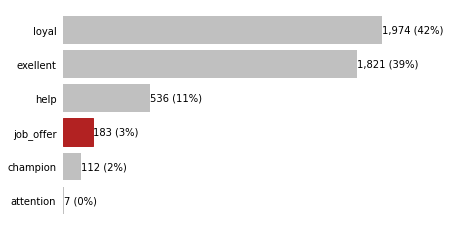

In [57]:
# Визуализируем результат 
segments_counts = rfm['Segment'].value_counts().sort_values(ascending=True)

fig, ax = plt.subplots()

bars = ax.barh(range(len(segments_counts)),
              segments_counts,
              color='silver')
ax.set_frame_on(False)
ax.tick_params(left=False,
               bottom=False,
               labelbottom=False)
ax.set_yticks(range(len(segments_counts)))
ax.set_yticklabels(segments_counts.index)

for i, bar in enumerate(bars):
        value = bar.get_width()
        if segments_counts.index[i] in ['job_offer']:
            bar.set_color('firebrick')
        ax.text(value,
                bar.get_y() + bar.get_height()/2,
                '{:,} ({:}%)'.format(int(value),
                                   int(value*100/segments_counts.sum())),
                va='center',
                ha='left'
               )

plt.show()

**Вывод:** большинство студентов 42% (1974 чел.) лояльны к нам, они на хороший балл прошли один курс.

39% (1821 чел.) завершили один курс с превосходным результатом.

Студенты группы "help" (11%, 536 чел.) не справились ни с одним экзаменом, возможно им нужна помощь. 

Группа "job offer" (3%, 183 чел.) показала наилучшие результаты по двум курсам. Это первые претенденты на вакантные места потенциальных работодателей.

Студенты группы "Champion" (2%, 112 чел.) также продемонстрировали хорошие результаты по двум экзаменам, они будут рассматриваться во вторую очередь. 

В последнюю группу вошли те, кто успешно сдал экзамен по одному курсу, но по каким-то причинам не прошел второй. С ними должна проводиться индивидуальная работа с выяснением причин провала.